## Lies `heights-weights.csv` in einen DataFrame

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import randint, norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

In [2]:

df = pd.read_csv("./data/heights-weights.csv", na_values=['Not Provided'])
df

,Height,Weight,Sex
0,179.227959,82.184853,male
1,161.272583,72.826430,female
2,163.369726,61.739943,female
3,156.540166,50.427042,female
4,155.050350,51.338797,female
...,...,...,...
9995,160.309698,65.892896,female
9996,176.081978,75.585614,female
9997,171.469924,77.832771,female
9998,161.473068,63.135486,female


## Visualisiere die Verteilung von `Height` getrennt nach `Sex`

<AxesSubplot:xlabel='Height', ylabel='Density'>

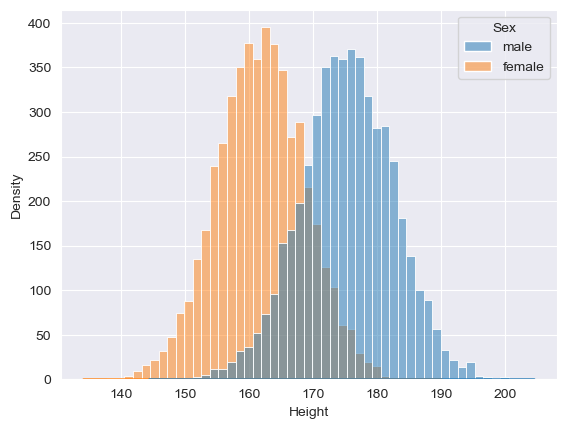

In [3]:
sns.kdeplot(data=df, x='Height', hue='Sex')
sns.histplot(data=df, x='Height', hue='Sex')

## Data Cleaning

Entferne alle `NaN` Werte folgendermaßen:
* entferne alle Observations, bei denen das Geschlecht unbekannt ist
* ergänze numerische Features mit einem Mittelwert des jeweiligen Geschlechts

In [4]:
df.isna().sum()

df = df.dropna(subset=['Sex'])

imputer = SimpleImputer(strategy='mean')

df.Weight = imputer.fit_transform(df[['Weight']])

df['Male'] = df.Sex.replace({'male': 1, 'female': 0})
df = df.drop(columns='Sex')
df

C:\Users\danie\AppData\Local\Temp\ipykernel_7252\3811217071.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Weight = imputer.fit_transform(df[['Weight']])
C:\Users\danie\AppData\Local\Temp\ipykernel_7252\3811217071.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Male'] = df.Sex.replace({'male': 1, 'female': 0})


,Height,Weight,Male
0,179.227959,82.184853,1
1,161.272583,72.826430,0
2,163.369726,61.739943,0
3,156.540166,50.427042,0
4,155.050350,51.338797,0
...,...,...,...
9995,160.309698,65.892896,0
9996,176.081978,75.585614,0
9997,171.469924,77.832771,0
9998,161.473068,63.135486,0


## Training

* verwende 20% Testdaten und `random_state=42`
* predicte `Height`. Dabei sind zwei verschiedene Vorgangsweisen zu implementieren und zu vergleichen:
    1. mit Hilfe einer einfachen linearen Regression ist `Height` **nur** aus `Weight` zu predicten
    2. neben `Weight` ist auch `Sex` zu verwenden.

In [5]:
X = df.drop(columns=['Height','Male'])
y = df.Height

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
def calc_error(model, X_test, y_true):
    predictions = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_true, predictions))

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
calc_error(lin_reg, X_test, y_test)

predictions = lin_reg.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)
error1 = predictions - y_test

In [8]:
X = df.drop(columns='Height')
y = df.Height

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
calc_error(lin_reg, X_test, y_test)

predictions = lin_reg.predict(X_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
np.sqrt(error)

error2 = predictions - y_test
X_test

,Weight,Male
3126,92.360539,1
1441,78.519450,1
4512,94.203929,1
39,82.801634,1
4511,77.236099,1
...,...,...
9962,87.504790,1
1561,67.991287,0
1670,90.868639,1
7733,93.849610,1


## Evaluierung (nur das Modell mit beiden Features)

* Stelle die Verteilung der Fehler in einem `distplot` dar
* Predicte deine eigenen Daten

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

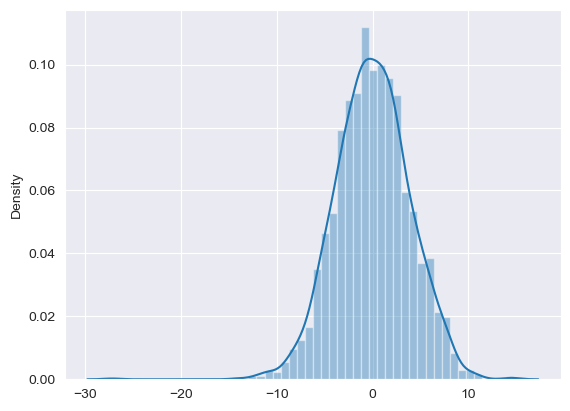

In [10]:
sns.distplot(x=error1)

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

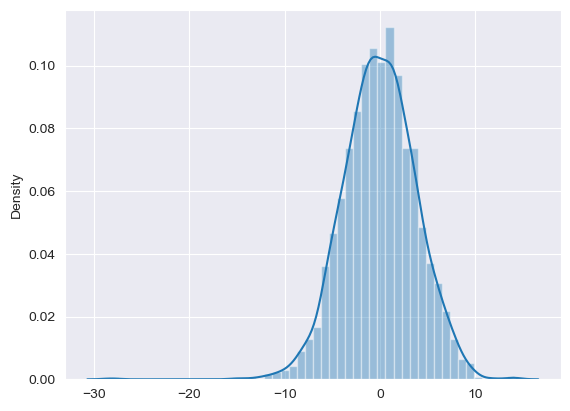

In [11]:
sns.distplot(x=error2)

In [25]:
prediction = lin_reg.predict([[65,1]])
prediction


C:\Users\danie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([162.10505352])